# Forensic Network & Image Forensics — Teaching Notebook

## Topics Covered
This notebook provides a beginner-friendly, structured walkthrough of key network and image forensics concepts. Each topic includes detailed explanations in markdown and executable code cells with thorough line-by-line comments.

### List of Topics
1. **Long-Tail / Short-Tail Analysis**  
   Understanding rare vs. frequent event distributions for anomaly detection.
2. **Geolocation Acquisition**  
   Techniques for mapping IP addresses and metadata to geographic locations.
3. **Blacklists and Whitelists**  
   Methods to filter and manage trusted vs. untrusted entities.
4. **Packet Analysis**  
   Inspecting and parsing network packets using Python libraries.
5. **Packet Reassembly**  
   Rebuilding fragmented packets to recover original transmitted data.
6. **Payload Extraction**  
   Extracting content from captured network traffic for forensic examination.
7. **Forensic Python: Acquiring Disk Images**  
   Using Python to safely create forensic disk images.
8. **Image Forensics with PIL (Pillow)**  
   Performing metadata extraction, hashing, and manipulation detection in images.
9. **SQL Queries in Forensics**  
   Applying SQL for structured forensic dataset analysis.


## Long-Tail / Short-Tail Analysis
### Concept
Long-tail and short-tail analysis involves studying the frequency of occurrences in datasets. In network forensics, this helps detect anomalies such as rare IP addresses, ports, or behaviors.

- **Short-tail:** Common, high-frequency items (e.g., top visited domains).
- **Long-tail:** Rare, low-frequency items (e.g., an uncommon IP in logs).

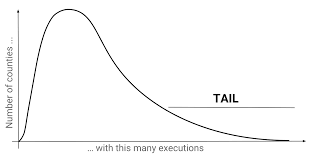


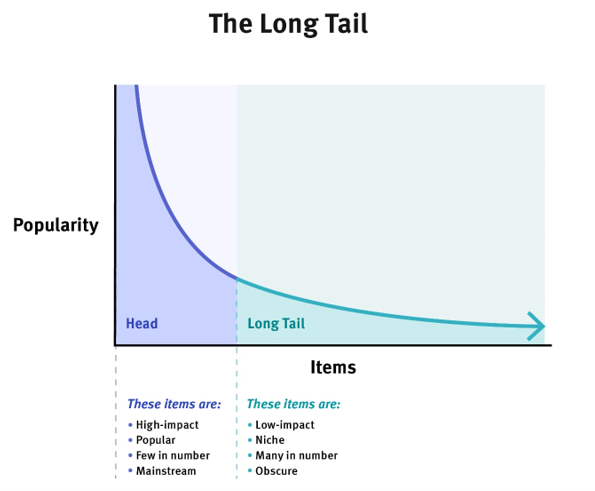


Read : https://pentesec.com/blog/what-is-long-tail-and-how-does-it-impact-cyber-security/

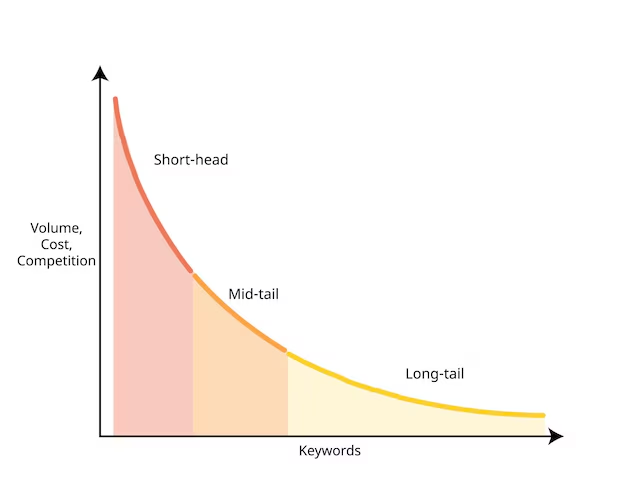

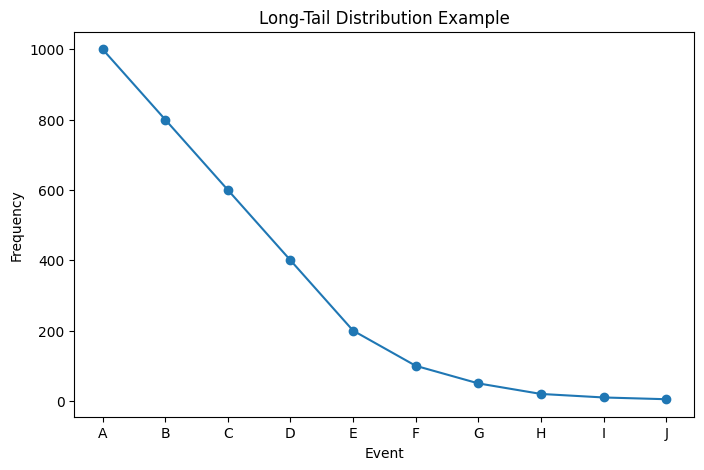

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a mock dataset of event frequencies
data = {'Event': ['A','B','C','D','E','F','G','H','I','J'], 'Frequency': [1000,800,600,400,200,100,50,20,10,5]}
df = pd.DataFrame(data)

# Plot long-tail distribution
plt.figure(figsize=(8,5))
plt.plot(df['Event'], df['Frequency'], marker='o')
plt.title('Long-Tail Distribution Example')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.show()

Top Source IPs (Short Tail):
sourceip
192.168.1.10    50
10.0.0.1        20
10.0.0.2        15
8.8.8.8         10
172.16.0.5       5
203.0.113.0      1
203.0.113.1      1
203.0.113.2      1
203.0.113.3      1
203.0.113.4      1
Name: count, dtype: int64

Long Tail Source IPs (appear only once):
sourceip
203.0.113.0     1
203.0.113.1     1
203.0.113.2     1
203.0.113.3     1
203.0.113.4     1
203.0.113.5     1
203.0.113.6     1
203.0.113.7     1
203.0.113.8     1
203.0.113.9     1
203.0.113.10    1
203.0.113.11    1
203.0.113.12    1
203.0.113.13    1
203.0.113.14    1
203.0.113.15    1
203.0.113.16    1
203.0.113.17    1
203.0.113.18    1
203.0.113.19    1
203.0.113.20    1
203.0.113.21    1
203.0.113.22    1
203.0.113.23    1
203.0.113.24    1
203.0.113.25    1
203.0.113.26    1
203.0.113.27    1
203.0.113.28    1
203.0.113.29    1
203.0.113.30    1
203.0.113.31    1
203.0.113.32    1
203.0.113.33    1
203.0.113.34    1
203.0.113.35    1
203.0.113.36    1
203.0.113.37    1
203.0.113.3

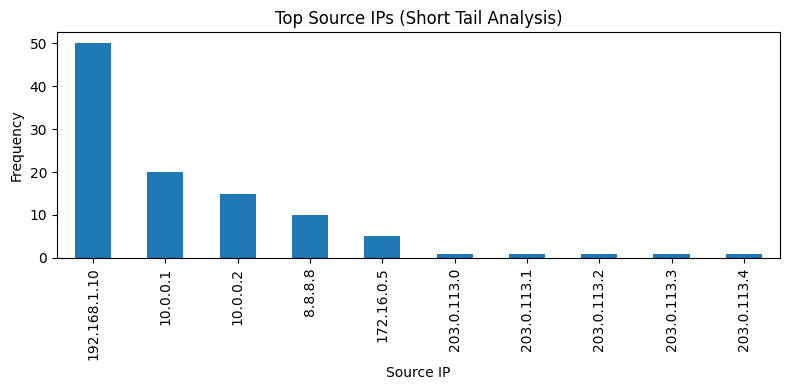

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic log data
np.random.seed(42)
source_ips = [
    "10.0.0.1", "10.0.0.2", "192.168.1.10", "172.16.0.5", "8.8.8.8"
]
# Add more frequent appearances for some IPs
synthetic_logs = []
for ip, freq in zip(source_ips, [20, 15, 50, 5, 10]):
    for _ in range(freq):
        log_entry = {
            "sourceip": ip,
            "dstip": f"192.168.0.{np.random.randint(1,255)}",
            "action": np.random.choice(["accept", "reject"]),
            "bytesin": np.random.randint(1000, 90000),
            "bytesout": np.random.randint(1000, 90000),
            "time": f"{np.random.randint(0,24):02d}.{np.random.randint(0,59):02d}.{np.random.randint(0,59):02d}(+5 GMT)"
        }
        synthetic_logs.append(log_entry)

# Add single-appearance (long tail) IPs
for i in range(50):
    synthetic_logs.append({
        "sourceip": f"203.0.113.{i}",
        "dstip": f"192.168.0.{np.random.randint(1,255)}",
        "action": "accept",
        "bytesin": np.random.randint(1000, 90000),
        "bytesout": np.random.randint(1000, 90000),
        "time": f"{np.random.randint(0,24):02d}.{np.random.randint(0,59):02d}.{np.random.randint(0,59):02d}(+5 GMT)"
    })

logs_df = pd.DataFrame(synthetic_logs)

# Short Tail Analysis
top_sourceip = logs_df['sourceip'].value_counts().head(10)
print("Top Source IPs (Short Tail):")
print(top_sourceip)

# Long Tail Analysis
sourceip_counts = logs_df['sourceip'].value_counts()
long_tail_sourceip = sourceip_counts[sourceip_counts == 1]
print("\nLong Tail Source IPs (appear only once):")
print(long_tail_sourceip)

# Plot
plt.figure(figsize=(8,4))
top_sourceip.plot(kind='bar')
plt.title("Top Source IPs (Short Tail Analysis)")
plt.xlabel("Source IP")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## Geolocation Acquisition
### Concept
Geolocation acquisition uses IP address data or metadata to infer physical locations of network activity.

In [8]:
# Example: Basic geolocation lookup using an API (mocked here for teaching)

# A dictionary mimicking IP to location mapping
ip_location = {
    '192.168.1.10': 'Local Network',
    '8.8.8.8': 'Mountain View, California',
    '123.45.67.89': 'Singapore'
}

# Iterate and print IP-location mapping
for ip, location in ip_location.items():
    print(f"IP Address: {ip} -> Location: {location}")

IP Address: 192.168.1.10 -> Location: Local Network
IP Address: 8.8.8.8 -> Location: Mountain View, California
IP Address: 123.45.67.89 -> Location: Singapore


## Blacklists and Whitelists
### Concept
Blacklists and whitelists define sets of allowed or disallowed entities (IPs, domains, users). They help isolate malicious or trusted sources during forensic analysis.

In [9]:
blacklist = ['192.168.10.50', '10.0.0.99']
whitelist = ['8.8.8.8', '1.1.1.1']

ip_logs = ['8.8.8.8', '10.0.0.99', '172.16.0.2']

for ip in ip_logs:
    if ip in blacklist:
        print(f"{ip} is BLACKLISTED")
    elif ip in whitelist:
        print(f"{ip} is WHITELISTED")
    else:
        print(f"{ip} is NEUTRAL")

8.8.8.8 is WHITELISTED
10.0.0.99 is BLACKLISTED
172.16.0.2 is NEUTRAL


## Packet Analysis
### Concept
Packet analysis inspects captured network traffic to extract information about communication patterns, protocols, or possible intrusions.

In [10]:
!pip install scapy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 27.6 MB/s eta 0:00:00


In [11]:
from scapy.all import IP, TCP

# Create a mock TCP packet
packet = IP(dst='8.8.8.8')/TCP(dport=80, sport=12345)

# Display packet summary
packet.show()

###[ IP ]###
  version   = 4
  ihl       = None
  tos       = 0x0
  len       = None
  id        = 1
  flags     = 
  frag      = 0
  ttl       = 64
  proto     = 6
  chksum    = None
  src       = 172.28.0.12
  dst       = 8.8.8.8
  \options   \
###[ TCP ]###
     sport     = 12345
     dport     = 80
     seq       = 0
     ack       = 0
     dataofs   = None
     reserved  = 0
     flags     = S
     window    = 8192
     chksum    = None
     urgptr    = 0
     options   = []





Here’s a simple explanation of each part of the Scapy code and the result:

***

### What the Code Does

- `from scapy.all import IP, TCP`
    - This imports the IP and TCP protocol classes from Scapy—a Python tool for working with network packets.
- `packet = IP(dst='8.8.8.8')/TCP(dport=80, sport=12345)`
    - This creates a network packet with:
        - An IP layer, going to the destination address `8.8.8.8` (Google DNS)
        - A TCP layer, with destination port 80 (web server) and source port 12345 (random client port)
- `packet.show()`
    - This prints a detailed, human-readable breakdown of your packet’s fields.

***

### What the Output Means

- The packet has two main layers: IP and TCP.


#### IP Layer

- `version = 4`: It’s an IPv4 packet.
- `src`: The source IP address (your Colab server’s address, here shown as `172.28.0.12`).
- `dst`: The destination IP (`8.8.8.8`).
- Other fields like ID, fragment offset, and checksum are used for managing packet delivery.


#### TCP Layer

- `sport = 12345`: The source port (your side, chosen arbitrarily).
- `dport = 80`: The destination port (the web server).
- `flags = S`: The S flag stands for SYN, meaning this packet wants to start a new TCP connection (like a web browser opening a new tab).
- Other fields (sequence, ack, window) are for tracking the state, reliability, and flow control of the TCP connection.

***


## Packet Reassembly
### Concept
Reassembly combines fragmented packets into the complete original message. This is crucial when analyzing fragmented TCP/IP data.

In [12]:
# Simulated packet reassembly
fragments = ['Hello ', 'World', '!']
reassembled = ''.join(fragments)
print("Reassembled Message:", reassembled)

Reassembled Message: Hello World!


In [13]:
from scapy.all import IP, fragment

# Create a large IP packet (more than 1480 bytes so it will be fragmented)
payload = b"A" * 4000  # 4000 bytes
ip_packet = IP(dst="8.8.8.8")/payload

# Fragment the packet (simulate network fragmentation)
frags = fragment(ip_packet, fragsize=1480)

print("Fragmented packets:")
for i, frag in enumerate(frags):
    print(f"Fragment {i+1}:")
    frag.show2()

# Collect the payloads and manually reassemble for demo
reassembled_payload = b"".join([bytes(frag[IP].payload) for frag in sorted(frags, key=lambda x: x[IP].frag)])
print("\nPayload reassembled (length):", len(reassembled_payload))
print("Payload matches original:", reassembled_payload == payload)


Fragmented packets:
Fragment 1:
###[ IP ]###
  version   = 4
  ihl       = 5
  tos       = 0x0
  len       = 1500
  id        = 1
  flags     = MF
  frag      = 0
  ttl       = 64
  proto     = 0
  chksum    = 0x98e9
  src       = 172.28.0.12
  dst       = 8.8.8.8
  \options   \
###[ Raw ]###
     load      = b'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

### Explanation

- The code creates a large dummy IP packet that won't fit in one standard Ethernet frame.
- It uses Scapy's `fragment()` to split it into IP fragments.
- It shows each fragment’s details, particularly offsets and sizes.
- The demo then reassembles the original payload by sorting fragments by offset and concatenating their data.
- You’ll see output confirming that your reassembled payload matches the original data sent.


## Payload Extraction
### Concept
Payload extraction retrieves data content from packets. This might include HTTP requests, binary payloads, or text data.

In [ ]:
# Simulated payload extraction from a packet
packet_data = {'header': 'TCP', 'payload': 'GET /index.html HTTP/1.1'}
print("Extracted Payload:", packet_data['payload'])

In [14]:
from scapy.all import IP, TCP, Raw

# Create a mock packet with an application payload (e.g., HTTP request)
payload = b'GET / HTTP/1.1\r\nHost: example.com\r\n\r\n'
packet = IP(dst='8.8.8.8')/TCP(dport=80, sport=12345)/Raw(load=payload)

# Extract the payload (layer 5 data)
if packet.haslayer(Raw):
    extracted_payload = packet[Raw].load
    print("Payload extracted:")
    print(extracted_payload.decode(errors="replace"))
else:
    print("No payload found in the packet.")

# To extract payloads from a list of packets:
packets = [packet]  # Imagine you have a list from sniff() or rdpcap()
all_payloads = [p[Raw].load for p in packets if p.haslayer(Raw)]
print("\nAll extracted payloads:")
for data in all_payloads:
    print(data.decode(errors="replace"))


Payload extracted:
GET / HTTP/1.1
Host: example.com



All extracted payloads:
GET / HTTP/1.1
Host: example.com




### Explanation

- It builds a TCP/IP packet containing a text payload (just like real-world traffic).
- The key step is `packet[Raw].load`, which gives you the actual data content—that is, everything above TCP/UDP (e.g., web requests, file data).
- The code checks for the presence of the `Raw` layer to avoid errors.
- You can extract payloads from individual packets or a list for batch analysis.

## Forensic Python: Acquiring Disk Images
### Concept
In digital forensics, a disk image is a bit-for-bit copy of a storage medium. Tools like `dd` or `dcfldd` can be automated using Python wrappers.

In digital forensics, a disk image is a bit-for-bit copy of an entire storage device (like a hard drive or USB stick), meaning every piece of data—including hidden, deleted, or unused sectors—is duplicated exactly. This ensures all evidence and context on the original device is preserved for analysis, without altering the original media.[^4][^6]

### Why Is Disk Imaging Important?

- **Preservation:** Investigators can examine the copy, keeping the original evidence intact.
- **Completeness:** Unlike normal file copies, it includes deleted files, operating system info, and slack space where hidden evidence may reside.
- **Integrity:** A disk image is validated with cryptographic hashes so courts or investigators know it is an exact duplicate.[^1][^5]

***

### How Is It Created?

Simple command-line tools like `dd` or `dcfldd` read every byte from a device (e.g., `/dev/sda`) and write it to an image file (e.g., `disk_image.dd`). This is often automated with Python or shell scripts for larger cases.

#### Example (for demonstration only, not to run on your own system):

```python
import subprocess

print("Simulating disk image acquisition...")
# WARNING: The following command, if uncommented, would make a forensic image of an entire disk.
# subprocess.run(['dd', 'if=/dev/sda', 'of=disk_image.dd', 'bs=4M'])
```

- `if=/dev/sda` — input file (the source disk)
- `of=disk_image.dd` — output file (the disk image)
- `bs=4M` — block size; reads and writes 4MB at a time for efficiency

***


In [15]:
import subprocess

# WARNING: Demonstration only — do NOT execute on real systems
print("Simulating disk image acquisition...")
# subprocess.run(['dd', 'if=/dev/sda', 'of=disk_image.dd', 'bs=4M'])

Simulating disk image acquisition...


## Image Forensics and PIL (Pillow)
### Concept
Image forensics examines digital images for authenticity and metadata (EXIF). The Pillow library allows programmatic access to these details.

In [16]:
from PIL import Image, ExifTags

# Create a simple image
test_img = Image.new('RGB', (100, 100), color='blue')
test_img.save('test_image.jpg')

# Open and inspect EXIF metadata
img = Image.open('test_image.jpg')
print("Format:", img.format)
print("Size:", img.size)

Format: JPEG
Size: (100, 100)


Image forensics is the process of examining digital images to check if they’ve been tampered with and to extract useful information from metadata, such as EXIF data. EXIF (Exchangeable Image File Format) metadata can include details like the device make/model, creation date, GPS coordinates, image dimensions, and software used for editing. This allows examiners to verify the authenticity of an image and reconstruct events.[^3][^5]

### What Does the Given Code Do?

```python
from PIL import Image, ExifTags

# Create a simple image
test_img = Image.new('RGB', (100, 100), color='blue')
test_img.save('test_image.jpg')

# Open and inspect EXIF metadata
img = Image.open('test_image.jpg')
print("Format:", img.format)
print("Size:", img.size)
```

- **Image Creation:** This creates a new image that’s 100x100 pixels with a blue background, and saves it as "test_image.jpg".
- **Image Inspection:** The image is then opened. `img.format` tells you the file format (JPG), and `img.size` gives the image dimensions (100, 100).


#### EXIF Metadata Inspection

You could extend this example to extract metadata as follows:

```python
exif_data = img._getexif()
if exif_data:
    for tag_id, value in exif_data.items():
        tag = ExifTags.TAGS.get(tag_id, tag_id)
        print(f"{tag:20}: {value}")
else:
    print("No EXIF metadata found.")
```

- This will print information like creation date, camera make/model, orientation, and potentially GPS location (if present).


### Why Is This Useful in Forensics?

- **Authenticity:** Metadata can show if an image is original or edited. Changes in software or timestamps can indicate manipulation.
- **Event Reconstruction:** Knowing when and where a photo was taken can be crucial for investigations.
- **Chain of Custody:** Details help track image sources and support digital evidence in legal cases.

In summary, image forensics with Pillow lets examiners create, inspect, and analyze images and their metadata to spot tampering and uncover important details for investigations.

## SQL Queries (Applied to Forensic Datasets)
### Concept
SQL helps manage structured forensic logs and queries for pattern analysis.

In [17]:
import sqlite3

# Create a mock database connection
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create table and insert records
cursor.execute('CREATE TABLE logs (id INTEGER, ip TEXT, event TEXT)')
records = [(1, '8.8.8.8', 'Access Granted'), (2, '10.0.0.99', 'Access Denied')]
cursor.executemany('INSERT INTO logs VALUES (?, ?, ?)', records)

# Query suspicious events
for row in cursor.execute('SELECT * FROM logs WHERE event="Access Denied"'):
    print(row)

conn.close()

(2, '10.0.0.99', 'Access Denied')


### Concept

SQL helps manage structured forensic logs and queries for pattern analysis.

import sqlite3

# Create a mock database connection

conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create table and insert records

cursor.execute('CREATE TABLE logs (id INTEGER, ip TEXT, event TEXT)')
records = [(1, '8.8.8.8', 'Access Granted'), (2, '10.0.0.99', 'Access Denied')]
cursor.executemany('INSERT INTO logs VALUES (?, ?, ?)', records)

# Query suspicious events

for row in cursor.execute('SELECT * FROM logs WHERE event="Access Denied"'):
print(row)

conn.close()

Here’s a simple explanation of using SQL queries with forensic datasets and what the example code does:

***

### Concept in Digital Forensics

- In digital forensics, logs and evidence are often stored in **structured tables** (like a spreadsheet or database).
- **SQL (Structured Query Language)** is a standard language for storing, searching, and analyzing structured data quickly—ideal for filtering logs, tracking patterns, and reconstructing events.[^5]
- Using a database makes it easy to automate repeated searches for suspicious patterns or specific events.

***

### Code Explained

```python
import sqlite3

# Create a mock database (stored only in memory, not on disk)
conn = sqlite3.connect(':memory:')
cursor = conn.cursor()

# Create a table called 'logs' with columns for ID, IP, and event description
cursor.execute('CREATE TABLE logs (id INTEGER, ip TEXT, event TEXT)')

# Insert some sample log records
records = [(1, '8.8.8.8', 'Access Granted'), (2, '10.0.0.99', 'Access Denied')]
cursor.executemany('INSERT INTO logs VALUES (?, ?, ?)', records)

# Query: Find all events where access was denied
for row in cursor.execute('SELECT * FROM logs WHERE event="Access Denied"'):
    print(row)  # Prints: (2, '10.0.0.99', 'Access Denied')

conn.close()
```


#### What’s Happening?

- You simulate a forensic log database with two rows: one successful access, one denied.
- The **SQL query** fetches only records where something suspicious ("Access Denied") occurred.
- This basic concept can be expanded for much larger datasets, e.g., searching millions of records for failed logins, unusual IPs, or specific timeframes.

***

### Why Is This Useful in Forensics?

- Lets you **filter, sort, and search** huge logs efficiently.
- Helps incident responders spot attacks ("Access Denied", multiple logins, etc.).
- Queries can be built for indicators of compromise or reconstruction of security events.
- Databases support **audit trails** and reporting for court or internal investigations.[^5]

SQL is a powerful tool in the forensic analyst’s toolkit for managing and analyzing evidence at scale.

### End of Notebook
